# Setting Up Google Colabotary

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Assignment Parameters
WORK_DIR = "/content/gdrive/MyDrive/Pattern-Recognition/"

# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Part 1: Real estate prices

In [ ]:
# Importing DATASET
dataset = pd.read_csv(WORK_DIR + "Assignment-1/houses.csv")
dataset.head(), dataset.shape

(   {02A6460F-C1F3-4977-B7ED-2A77C79302AE}   52000  ...  A A.1
 0  {5EEB0C41-09F5-4BDF-A73E-A4E72E20BFC4}   57000  ...  A   A
 1  {09975216-3588-418C-B6C5-A5704B0E77DE}   69500  ...  A   A
 2  {44CB83B9-0EC3-48D4-9B8D-B34D13D3C09E}   84000  ...  A   A
 3  {74828706-CBFC-406D-B7B6-394B5863E22E}  110000  ...  A   A
 4  {38531A9B-1D6A-466B-93AC-D91243B9A331}   94500  ...  A   A
 
 [5 rows x 16 columns], (99999, 16))

In [ ]:
property_price = dataset.iloc[:, 1].values
property_price.shape

(99999,)

## Computing Basic Descriptive Statistics, (mean, median, standard deviation, minimum, and maximum)

In [ ]:
print("Maximum Property Price:", np.max(property_price))
print("Minimum Property Price:", np.min(property_price))
print("Mean Property Price:", np.mean(property_price))
print("Median Property Price:", np.median(property_price))
print("Standard Deviation Property Price:", np.std(property_price))

Maximum Property Price: 48465717
Minimum Property Price: 150
Mean Property Price: 174387.9776197762
Median Property Price: 129000.0
Standard Deviation Property Price: 351463.1846717023


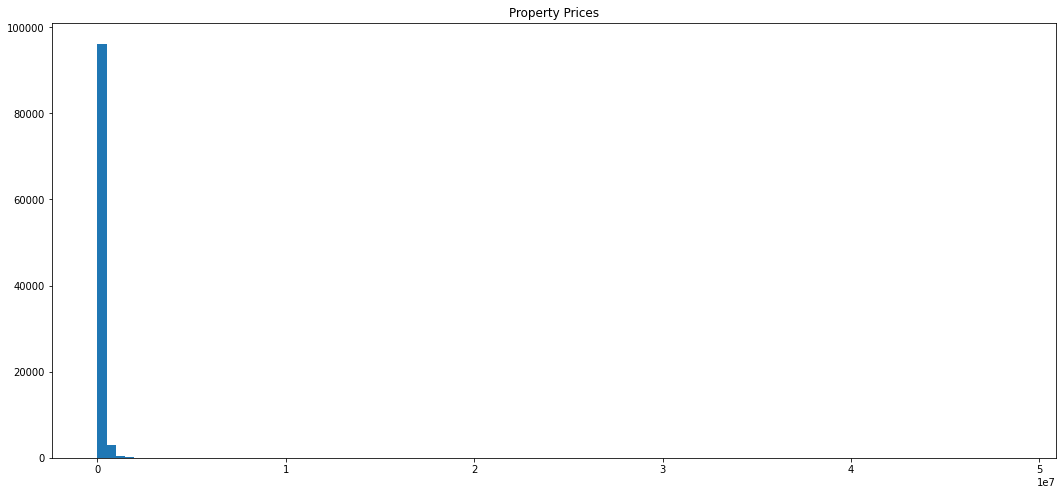

In [ ]:
# Plotting Property price Histogram
fig, ax = plt.subplots(figsize = (18, 8))
ax.set_axisbelow(True)
plt.hist(
    property_price,
    rwidth = 20,
    bins = np.arange(
        min(property_price),
        max(property_price) + 1,
        (max(property_price) - min(property_price)) / 100
    )
)
plt.title("Property Prices")
plt.show()

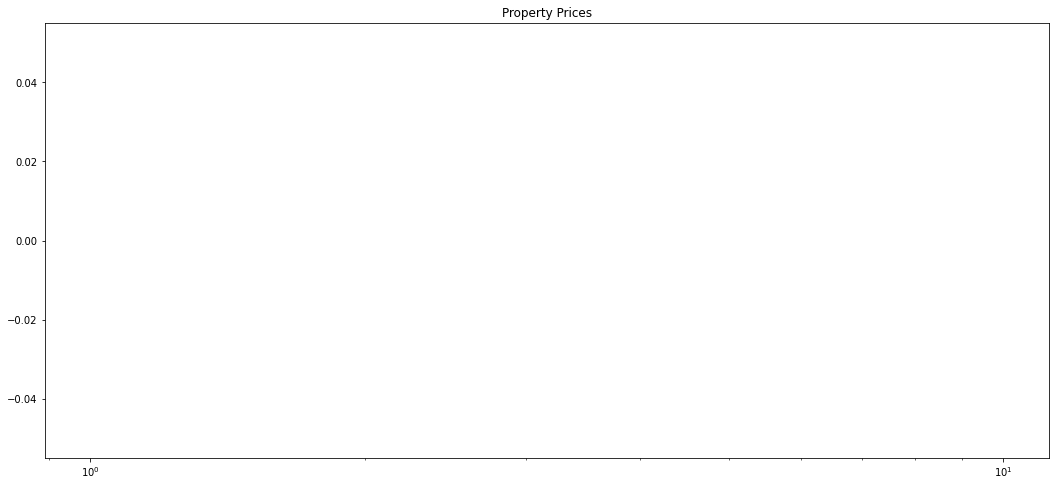

In [ ]:
# Beutifing Histogram
fig, ax = plt.subplots(figsize = (18, 8))
ax.set_axisbelow(True)
plt.hist(
    property_price,
    density = True,
    rwidth = 20,
    bins = np.logspace(
        np.log10(min(property_price)),
        np.log10(max(property_price) + 1),
        1
    )
)
plt.gca().set_xscale("log")
plt.title("Property Prices")
plt.show()


## LONDON Prices

In [ ]:
is_in_london = dataset.iloc[:, 12].values

In [ ]:
in_london_property_price = list()
not_in_london_property_price = list()
for i, ele in enumerate(is_in_london):
    if "LONDON" in ele:
        in_london_property_price.append(property_price[i])
    else:
        not_in_london_property_price.append(property_price[i])
in_london_property_price = np.array(in_london_property_price)
not_in_london_property_price = np.array(not_in_london_property_price)


In [ ]:
in_london_property_price.shape, not_in_london_property_price.shape

((29,), (99970,))

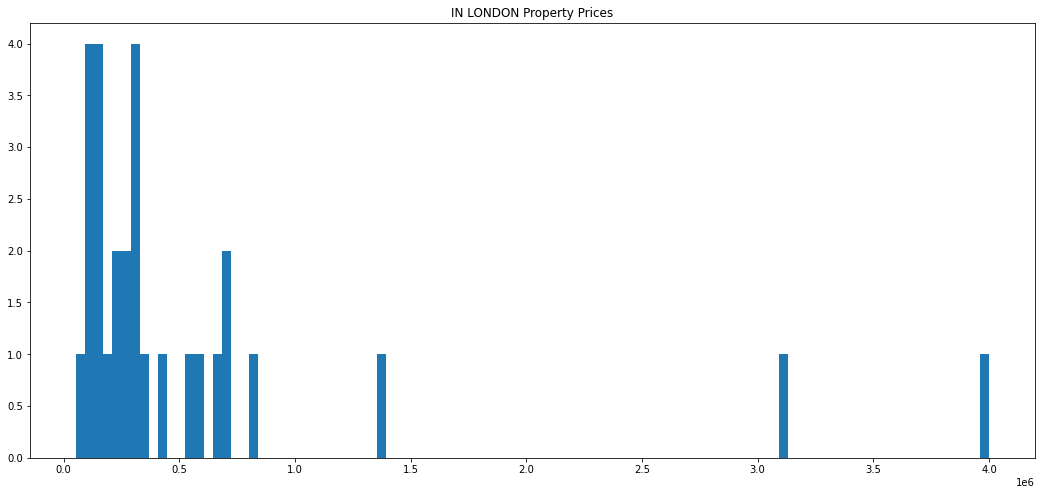

In [ ]:
# IN LONDON Property price Histogram
fig, ax = plt.subplots(figsize = (18, 8))
ax.set_axisbelow(True)
plt.hist(
    in_london_property_price,
    rwidth = 10,
    bins = np.arange(
        min(in_london_property_price),
        max(in_london_property_price) + 1,
        (max(in_london_property_price) - min(in_london_property_price)) / 100
    )
)
plt.title("IN LONDON Property Prices")
plt.show()

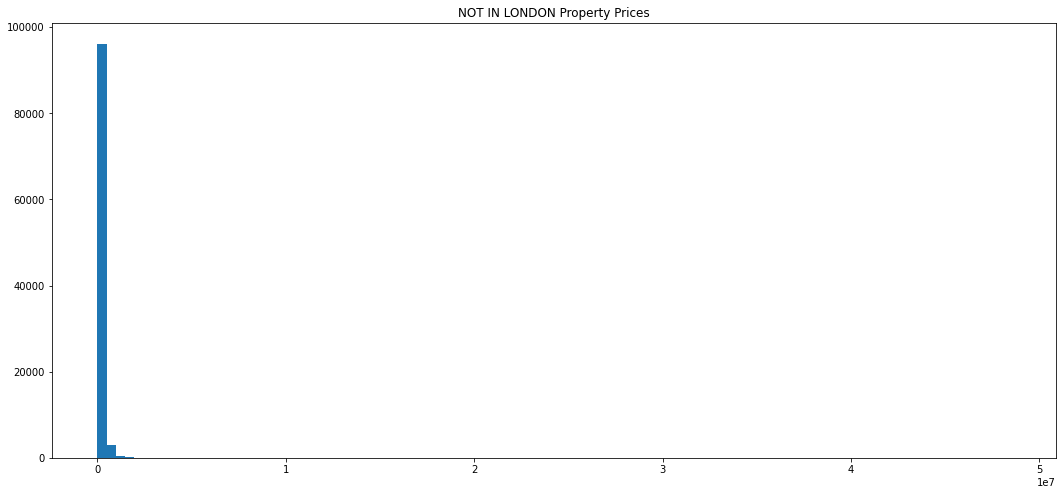

In [ ]:
# NOT IN LONDON Property price Histogram
fig, ax = plt.subplots(figsize = (18, 8))
ax.set_axisbelow(True)
plt.hist(
    not_in_london_property_price,
    rwidth = 10,
    bins = np.arange(
        min(not_in_london_property_price),
        max(not_in_london_property_price) + 1,
        (max(not_in_london_property_price) - min(not_in_london_property_price)) / 100
    )
)
plt.title("NOT IN LONDON Property Prices")
plt.show()

In [ ]:
# ****************************************************************************************************
# ****************************************************************************************************
# ****************************************************************************************************
# ****************************************************************************************************
# ***************************************Optional Task************************************************
# ****************************************************************************************************
# ****************************************************************************************************
# ****************************************************************************************************
# ****************************************************************************************************

# Part 2: Generating Random Numbers (quick detour)

In [ ]:
n_inst = 10000
range_l = 1
range_h = 10

In [ ]:
# Generating Random Numbers
random_numbers = np.random.randint(range_h, size = (n_inst))

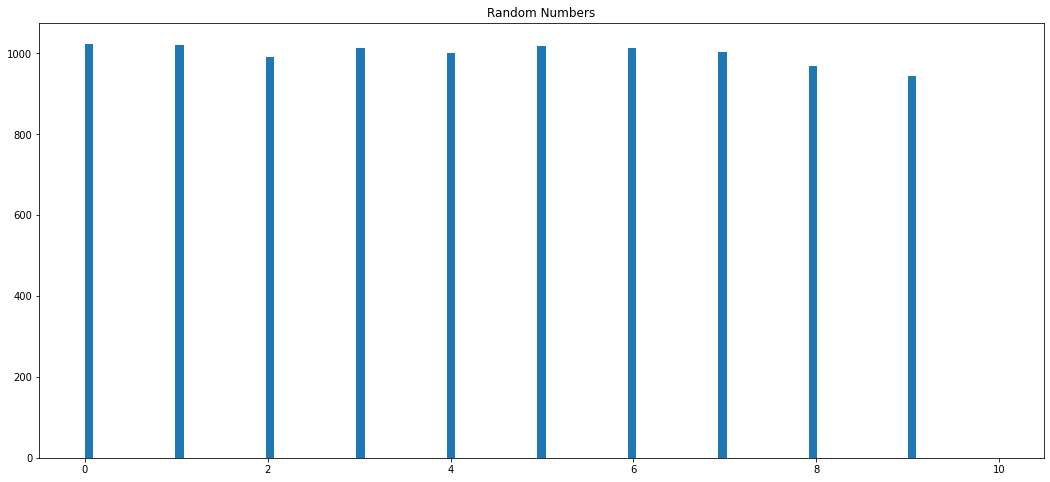

In [ ]:
# Random Numbers Histogram
fig, ax = plt.subplots(figsize = (18, 8))
ax.set_axisbelow(True)
plt.hist(
    random_numbers,
    rwidth = 10,
    bins = np.arange(
        min(random_numbers),
        max(random_numbers) + 1,
        (max(random_numbers) - min(random_numbers)) / 100
    )
)
plt.title("Random Numbers")
plt.show()

In [ ]:
n_inst = 10000
loc = 0
scale = 1

In [ ]:
# Generating Random Numbers in NORMAL(Guassian) Distribution
guass_random_numbers = np.random.normal(loc = loc, scale = scale, size = (n_inst))

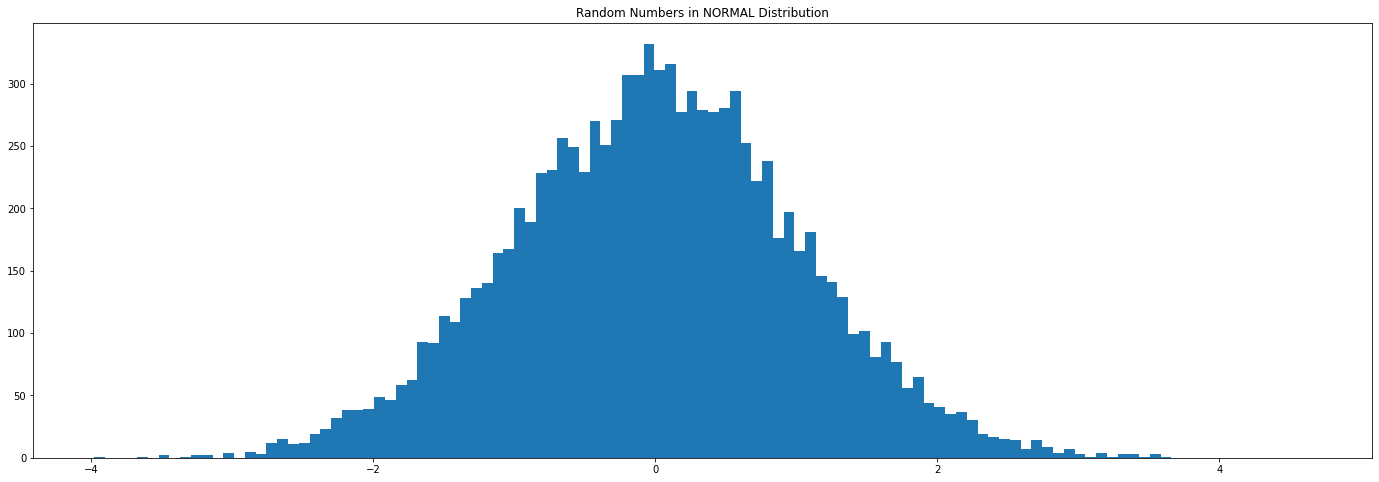

In [ ]:
# Random Numbers in NORMAL Distribution Histogram
fig, ax = plt.subplots(figsize = (24, 8))
ax.set_axisbelow(True)
plt.hist(
    guass_random_numbers,
    rwidth = 1,
    bins = np.arange(
        min(guass_random_numbers),
        max(guass_random_numbers) + 1,
        (max(guass_random_numbers) - min(guass_random_numbers)) / 100
    )
)
plt.title("Random Numbers in NORMAL Distribution")
plt.show()

# Part 3

## (a) Modeling a Student at an Examination

### Answering a single question

In [ ]:
# Correct answer calculation 
def success(p_success):
    return np.random.randint(100,) < (p_success * 100)

In [ ]:
n_inst = 10000
p = 0.7
scores = np.array([int(success(p)) for _ in range(n_inst)])

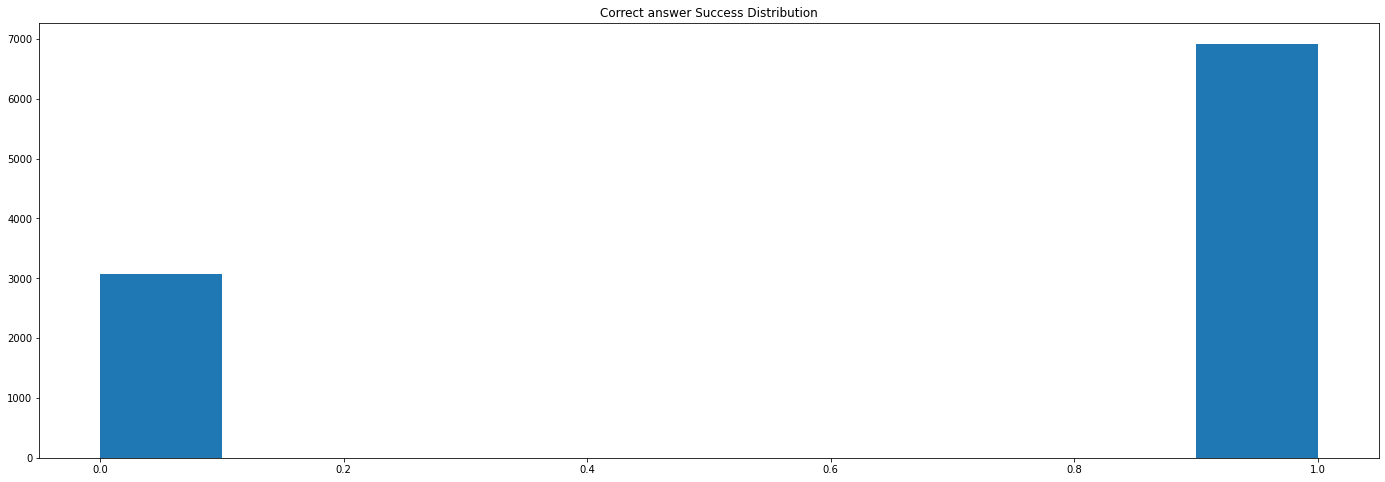

In [ ]:
# Correct Answer Success Distribution Histogram
fig, ax = plt.subplots(figsize = (24, 8))
ax.set_axisbelow(True)
plt.hist(
    scores
)
plt.title("Correct answer Success Distribution")
plt.show()

In [ ]:
def exam_score(p_correct, n_instances):
    return np.sum([1 for i in range(n_instances) if success(p_correct)])

In [ ]:
n_inst = 10000
n_ques = 100
p = 0.7
scores = np.array([exam_score(p, n_ques) for _ in range(n_inst)])

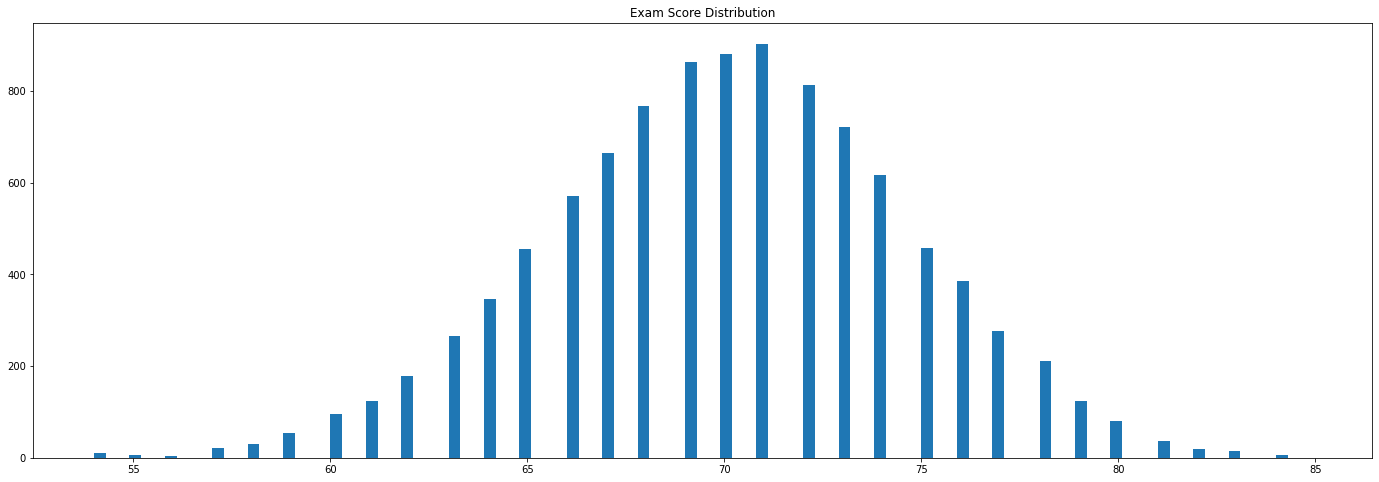

In [ ]:
# Exam Score Distribution Histogram
fig, ax = plt.subplots(figsize = (24, 8))
ax.set_axisbelow(True)
plt.hist(
    scores,
    rwidth = 1,
    bins = np.arange(
        min(scores),
        max(scores) + 1,
        (max(scores) - min(scores)) / 100
    )
)
plt.title("Exam Score Distribution")
plt.show()

In [ ]:
MAX_ATTEMPTS = 10000000
def number_of_attempts(p_pass):
    i = 1
    while not success(p_pass) and i < MAX_ATTEMPTS:
        i += 1
    return i

In [ ]:
n_inst = 1000000
p = 0.3
num_attempts = np.array([number_of_attempts(p) for _ in range(n_inst)])

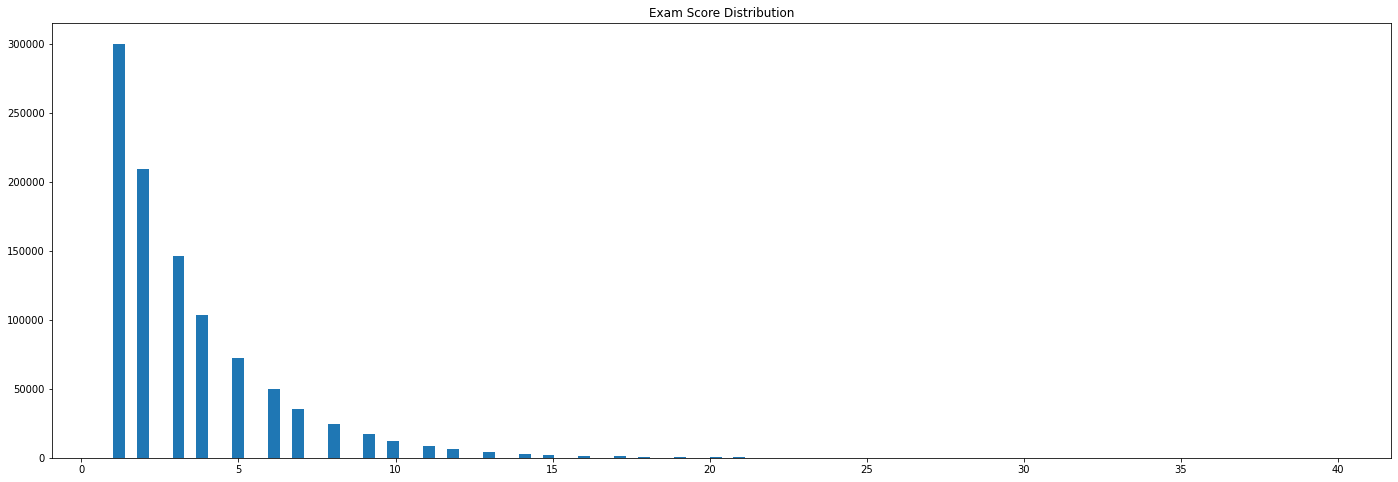

In [ ]:
# Number OF Attempts Distribution Histogram
fig, ax = plt.subplots(figsize = (24, 8))
ax.set_axisbelow(True)
plt.hist(
    num_attempts,
    rwidth = 1,
    bins = np.arange(
        min(num_attempts),
        max(num_attempts) + 1,
        (max(num_attempts) - min(num_attempts)) / 100
    )
)
plt.title("Exam Score Distribution")
plt.show()

In [ ]:
male_prob = 0.4
male_he_me = 140
male_he_dis = 15
male_we_me = 90
male_we_dis = 10
female_he_me = 195
female_he_dis = 10
female_we_me = 60
female_we_dis = 5
def get_height_weight(n_instances):
    heights = list()
    weights = list()
    gender = list()
    for _ in range(n_instances):
        if success(male_prob):
            heights.append(np.random.normal(male_he_me, male_he_dis))
            weights.append(np.random.normal(male_we_me, male_we_dis))
            gender.append(0)
        else:
            heights.append(np.random.normal(female_he_me, female_he_dis))
            weights.append(np.random.normal(female_we_me, female_we_dis))
            gender.append(1)
    return np.array(heights), np.array(weights), np.array(gender)

In [ ]:
n_inst = 50
he, we, ge = get_height_weight(n_inst)
he.shape, we.shape, ge.shape

((50,), (50,), (50,))

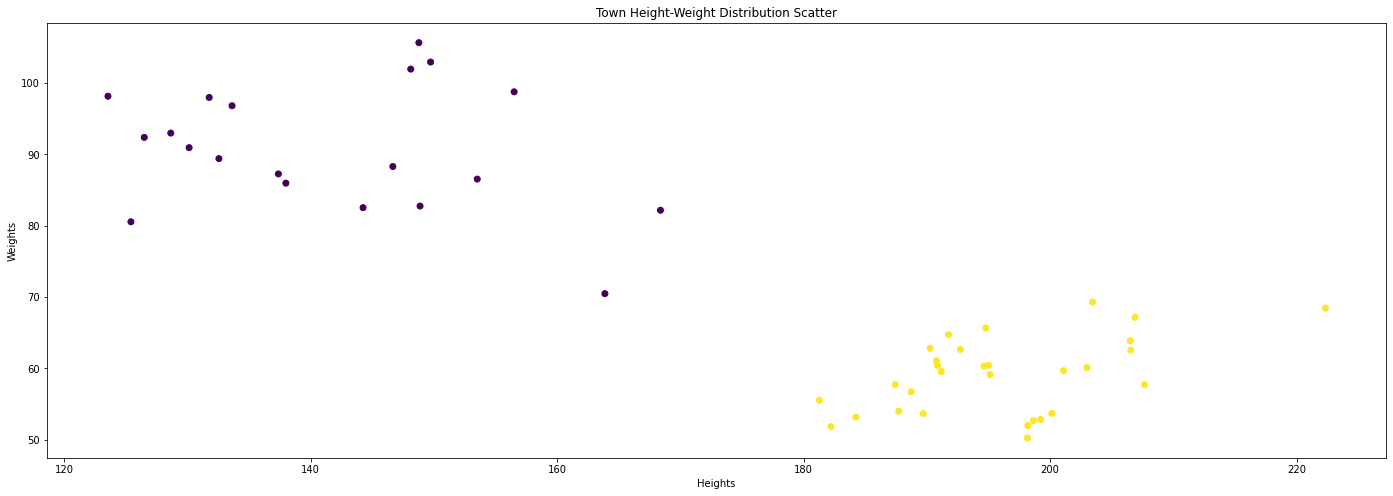

In [ ]:
# Town Height-Weight Distribution Scatter
fig, ax = plt.subplots(figsize = (24, 8))
ax.set_axisbelow(True)
plt.scatter(he, we, c = ge)
plt.xlabel("Heights")
plt.ylabel("Weights")
plt.title("Town Height-Weight Distribution Scatter")
plt.show()

In [ ]:
n_inst = 50000
he, we, ge = get_height_weight(n_inst)
he.shape, we.shape, ge.shape

((50000,), (50000,), (50000,))

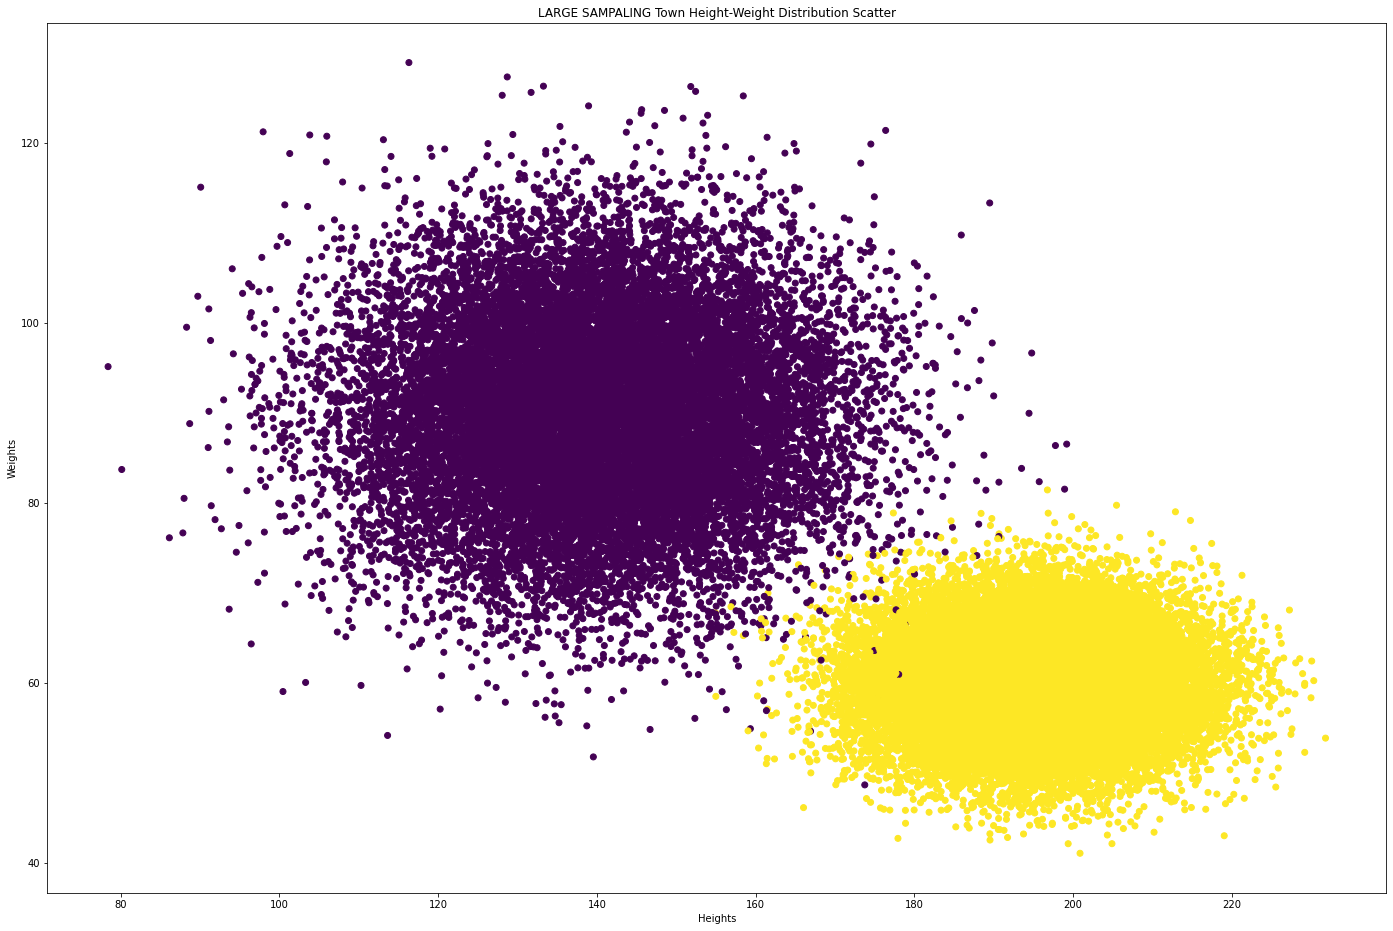

In [ ]:
# LARGE SAMPALING Town Height-Weight Distribution Scatter
fig, ax = plt.subplots(figsize = (24, 16))
ax.set_axisbelow(True)
plt.scatter(he, we, c = ge)
plt.xlabel("Heights")
plt.ylabel("Weights")
plt.title("LARGE SAMPALING Town Height-Weight Distribution Scatter")
plt.show()

### Reverse Enginerring Data

In [ ]:
unique, counts = np.unique(ge, return_counts=True)
ge_dict = dict(zip(unique, counts))
ge_dict

{0: 19769, 1: 30231}

In [ ]:
print("Male percentage:", ge_dict[0] / (ge_dict[0] + ge_dict[1]))
print("Female percentage:", ge_dict[1] / (ge_dict[0] + ge_dict[1]))

Male percentage: 0.39538
Female percentage: 0.60462


In [ ]:
female_weights = np.array([we[i] for i in range(n_inst) if ge[i] == 1])

In [ ]:
print("Average Female Weight:", np.sum(female_weights) / ge_dict[1])

Average Female Weight: 60.044620507253306
